In [1]:
%matplotlib inline
import torch 
from d2l import torch as d2l

def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            s[:] = rho * s + (1 - rho) * p.grad ** 2
            g = torch.sqrt(delta + eps) / torch.sqrt(s + eps) * p.grad
            p[:] -= g
            delta = rho * delta + (1 - rho) * g ** 2
        p.grad.data.zero_()


loss: 0.247, 0.017 sec/epoch


([0.018988847732543945,
  0.03497934341430664,
  0.04998135566711426,
  0.06998038291931152,
  0.08498740196228027,
  0.10397624969482422,
  0.12295198440551758,
  0.14094209671020508,
  0.15594696998596191,
  0.17093682289123535,
  0.1899247169494629,
  0.2059006690979004,
  0.2218763828277588,
  0.23588109016418457,
  0.24988770484924316],
 [0.4332320223649343,
  0.3977546626329422,
  0.37014340873559315,
  0.3419583074649175,
  0.32479663467407227,
  0.3099740147590637,
  0.2903122317393621,
  0.2769136436780294,
  0.2668652323881785,
  0.26193680441379547,
  0.2586294998327891,
  0.2530073682864507,
  0.2524767742554347,
  0.25030261532465614,
  0.2474867635567983])

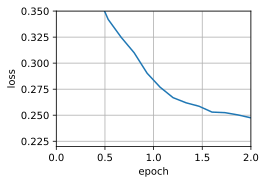

In [2]:
data_iter, feature_dim = d2l.get_data_ch11(10)
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim), {'rho':.9}, data_iter, feature_dim)

loss: 0.244, 0.014 sec/epoch


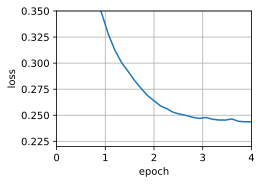

In [3]:
trainer = torch.optim.Adadelta
d2l.train_concise_ch11(trainer, {'rho':.9}, data_iter)